In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
st = pd.read_csv("euro.csv", index_col = "Date", parse_dates = True)
st.head()

,Price,Open,High,Low,Change %
Date,,,,,
2018-11-05,22.8634,22.8237,22.8636,22.8109,0.17%
2018-11-04,22.8237,22.8030,22.8521,22.8030,0.05%
2018-11-02,22.8121,22.9957,23.0576,22.7664,-0.80%
2018-11-01,22.9965,23.0065,23.0683,22.8482,-0.05%
2018-10-31,23.0073,22.7481,23.1703,22.6977,1.14%


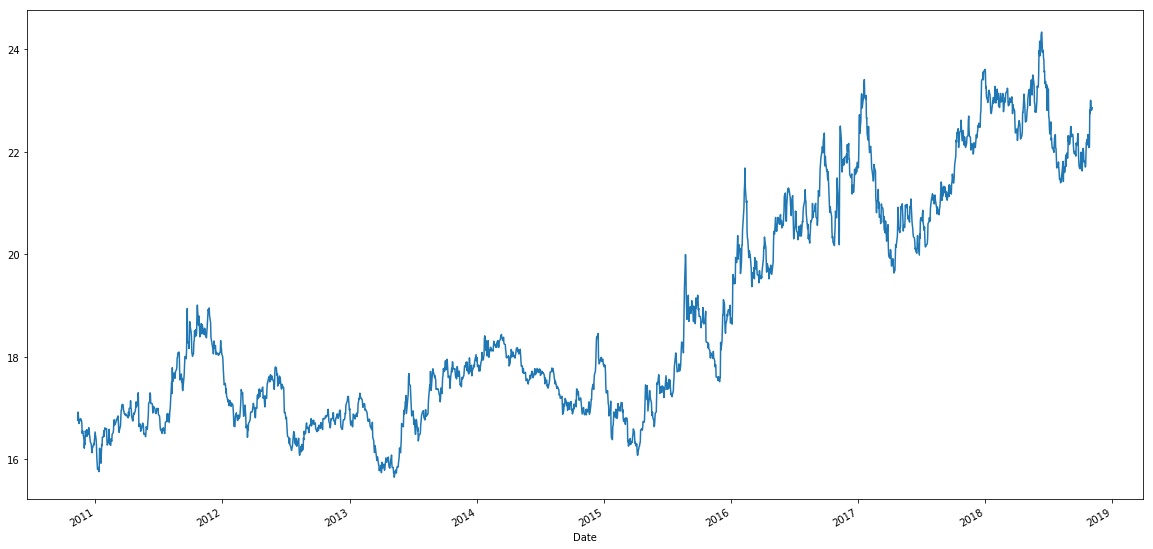

In [66]:
st["Price"].plot(figsize=(20,10))

In [67]:
st["Price"].describe()

count    2107.000000
mean       18.816478
std         2.238105
min        15.645700
25%        16.948000
50%        17.870400
75%        20.790850
max        24.339500
Name: Price, dtype: float64

In [68]:
tsd = st["Price"].groupby(pd.TimeGrouper(freq='M')).agg('mean')

/home/sandy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [69]:
tsd.describe()

count    97.000000
mean     18.803909
std       2.234907
min      15.901359
25%      16.960035
50%      17.842110
75%      20.725900
max      23.693920
Name: Price, dtype: float64

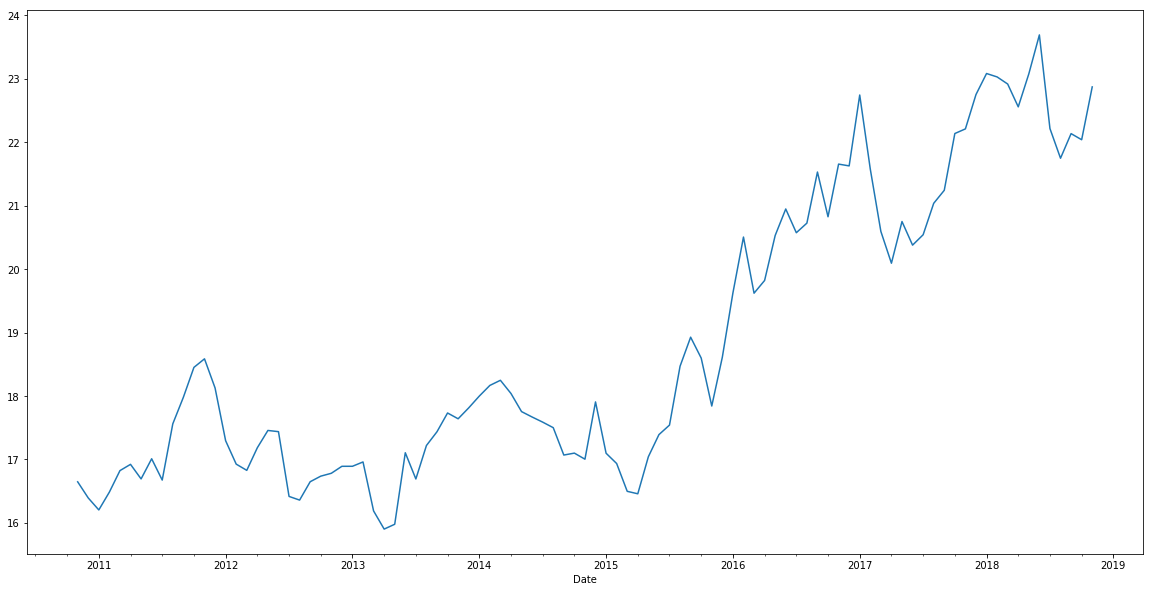

In [70]:
tsd.plot(figsize=(20,10))

In [71]:
import statsmodels.api as sm
sm.stats.durbin_watson(tsd)

0.0007754088268299479

In [72]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(tsd, order=(4,0,2))
model_fit = model.fit()

In [75]:
pred = model_fit.predict(start='2013-09', end='2019-06')

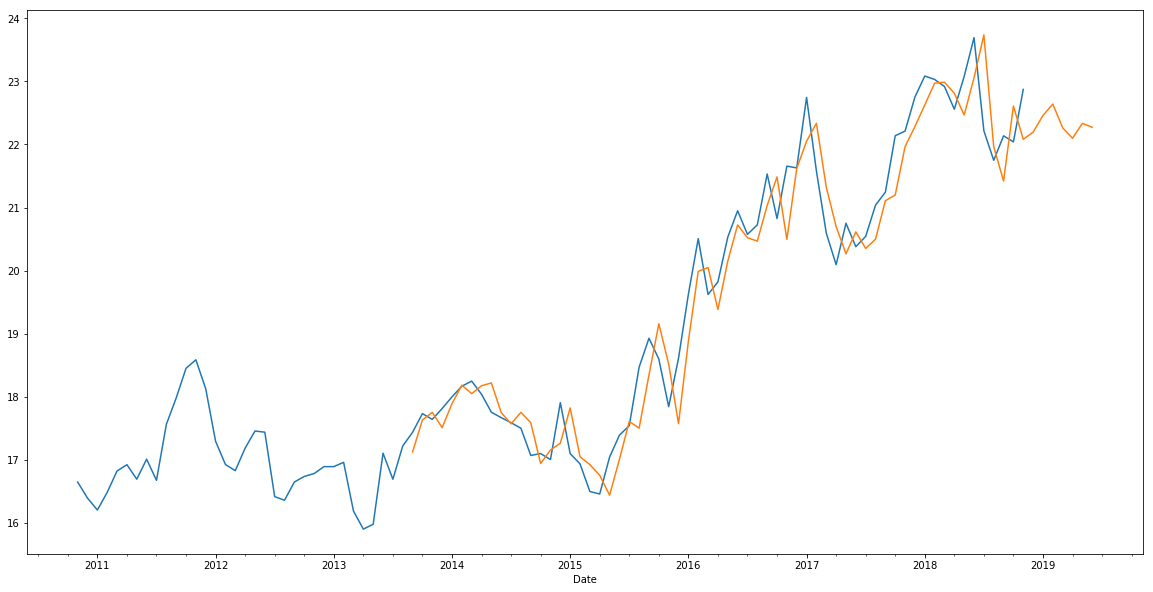

2013-09-30    17.124630
2013-10-31    17.631828
2013-11-30    17.752035
2013-12-31    17.509775
2014-01-31    17.889578
Freq: M, dtype: float64
Date
2010-11-30    16.646764
2010-12-31    16.392274
2011-01-31    16.203495
2011-02-28    16.485045
2011-03-31    16.823378
Freq: M, Name: Price, dtype: float64


In [76]:
tsd.plot(figsize=(20,10))
pred.plot(figsize=(20,10))
plt.show()

print(pred.head())
print(tsd.head())